# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [204]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", )


# Display the data table for preview
# Display the first 5 rows of the combined DataFrame
#print(combined_data.head())
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [205]:
# Checking the number of mice.
 ## Assuming "Mouse ID" is the column with mouse identifiers
number_of_mice = combined_data["Mouse ID"].nunique()

print(f"Number of unique mice: {number_of_mice}")


Number of unique mice: 249


In [206]:
# Our data should be uniquely identified by Mouse ID and Timepoint

duplicates = combined_data.duplicated(subset=["Mouse ID", "Timepoint"])
print(duplicates.info())

number_of_duplicates = duplicates.sum()
print(f"Number of duplicate entries (Mouse ID and Timepoint): {number_of_duplicates}")


# Filtering the DataFrame to show only the duplicate rows







<class 'pandas.core.series.Series'>
RangeIndex: 1893 entries, 0 to 1892
Series name: None
Non-Null Count  Dtype
--------------  -----
1893 non-null   bool 
dtypes: bool(1)
memory usage: 2.0 KB
None
Number of duplicate entries (Mouse ID and Timepoint): 5


In [207]:
##If you decide that duplicates should be removed, you can drop them.
if number_of_duplicates > 0:
    combined_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
    print("Duplicates removed.", combined_data)
combined_data

Duplicates removed.      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        b128          5           45.651331                 0    Capomulin   
2        b128         10           43.270852                 0    Capomulin   
3        b128         15           43.784893                 0    Capomulin   
4        b128         20           42.731552                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1888     m601         25           33.118756                 1    Capomulin   
1889     m601         30           31.758275                 1    Capomulin   
1890     m601         35           30.834357                 1    Capomulin   
1891     m601         40           31.378045                 1    Capomulin   
1892     m601         45           28.430964                 1    Capomulin   

         Sex  Age_months  Weigh

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [208]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


all_data_for_duplicates = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]
duplicate_mouse_ids

array([], dtype=object)

In [209]:
combined_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [210]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
## Step 1: Identify all duplicate entries based on 'Mouse ID' and 'Timepoint'
duplicate_entries = combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_entries
## Step 2: Filter the DataFrame to include only duplicate rows
duplicates_data = combined_data[duplicate_entries]

## Step 3: Extract all data for the mouse IDs found in the duplicates
duplicate_mouse_ids = duplicates_data['Mouse ID'].unique()
duplicate_mouse_ids

all_data_for_duplicate_ids = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]
all_data_for_duplicate_ids



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [211]:
## Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Assuming duplicate_mouse_ids contains the IDs of the duplicate mice
# Filter the combined_data DataFrame to exclude rows with these mouse IDs

clean_data = combined_data[~combined_data["Mouse ID"].isin(duplicate_mouse_ids)]

print("Clean data excluding duplicates:", clean_data)
clean_data.head()



Clean data excluding duplicates:      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        b128          5           45.651331                 0    Capomulin   
2        b128         10           43.270852                 0    Capomulin   
3        b128         15           43.784893                 0    Capomulin   
4        b128         20           42.731552                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1888     m601         25           33.118756                 1    Capomulin   
1889     m601         30           31.758275                 1    Capomulin   
1890     m601         35           30.834357                 1    Capomulin   
1891     m601         40           31.378045                 1    Capomulin   
1892     m601         45           28.430964                 1    Capomulin   

         Sex  Age_

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [212]:
# Checking the number of mice in the clean DataFrame.
combined_data = combined_data["Mouse ID"].nunique()

print(f"Number of unique mice: {number_of_mice}")


Number of unique mice: 249


## Summary Statistics

In [322]:
print(clean_data.columns) 

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')


In [321]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Calculate the required statistics for 'Tumor Volume' within each regimen group
summary_statistics = grouped_data['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Dev='std',
    Tumor_Volume_Std_Err='sem'
).reset_index()

# Display the summary statistics table

summary_statistics


# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line


,Drug Regimen,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Err
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [320]:
# Group the cleaned data by 'Drug Regimen'

grouped_regimen = clean_data.groupby('Drug Regimen')

# Aggregate the required statistics for 'Tumor Volume (mm3)'
summary_statistics = grouped_regimen['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    var='var',
    std='std',
    sem='sem'
).reset_index()

# Display the summary statistics table
summary_statistics

,Drug Regimen,Mean,Median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

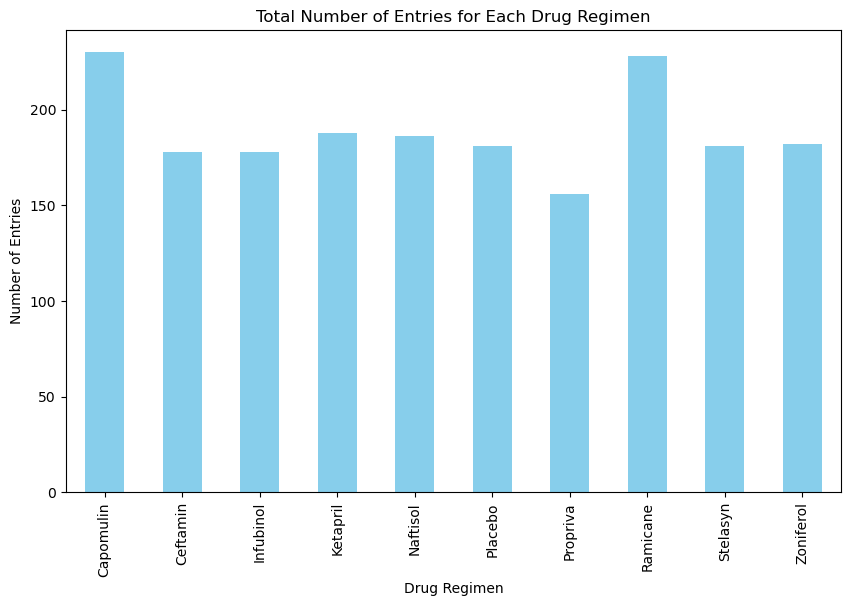

In [323]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group by 'Drug Regimen' and count the number of entries in each group
regimen_counts = clean_data.groupby('Drug Regimen').size()

# Generate a bar plot using Pandas
regimen_counts.plot(kind='bar', figsize=(10, 6), ylabel='Number of Entries', title='Total Number of Entries for Each Drug Regimen', color='skyblue')

# Display the plot
plt.show()


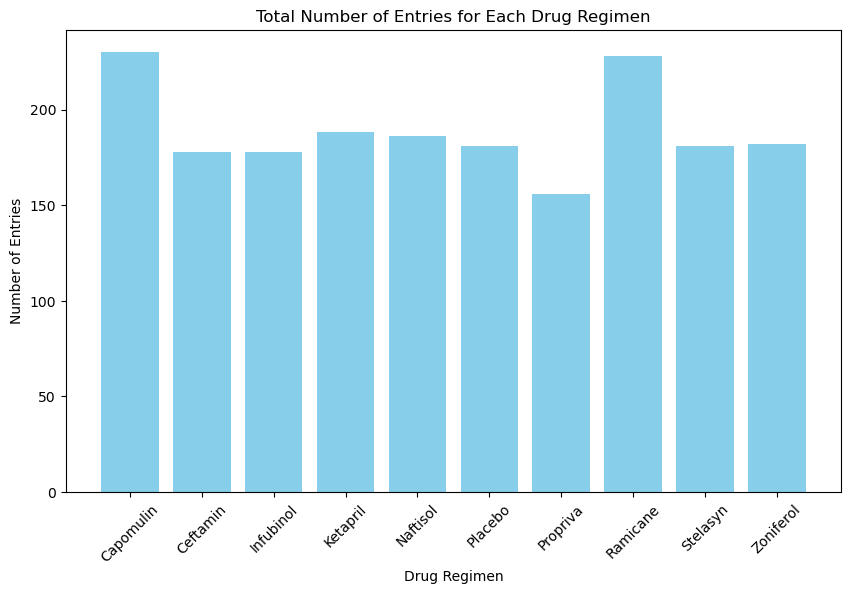

In [324]:


# Group by 'Drug Regimen' and count the number of entries in each group
regimen_counts = clean_data.groupby('Drug Regimen').size()

# Get the names of the drug regimens and the counts
regimen_names = regimen_counts.index.tolist()
counts = regimen_counts.values.tolist()

# Create the bar plot using Pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_names, counts, color='skyblue')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Entries')
plt.title('Total Number of Entries for Each Drug Regimen')
plt.xticks(rotation=45)  # Rotate the drug regimen names for better readability

# Display the plot
plt.show()


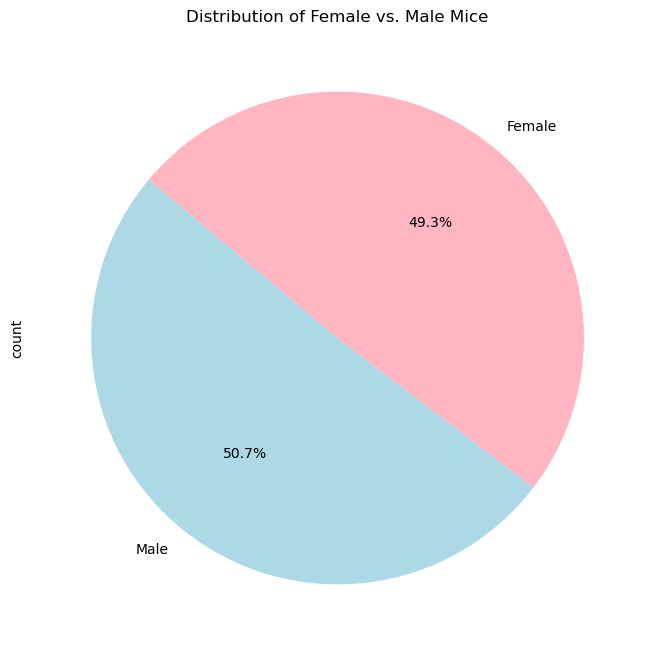

In [325]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Assuming the gender column in your DataFrame is named 'Sex'
gender_distribution = clean_data['Sex'].value_counts()

# Generate a pie plot using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightpink'], figsize=(8, 8), title='Distribution of Female vs. Male Mice')

# Display the plot
plt.show()


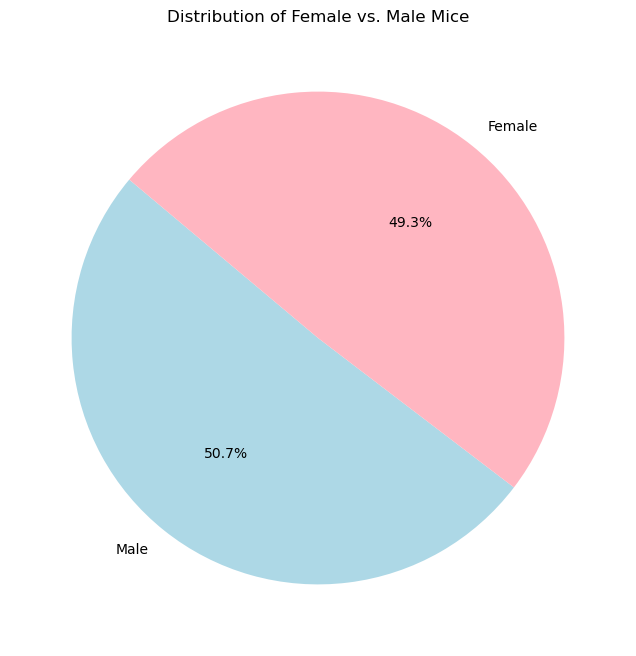

In [326]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt

# Assuming the gender column in your DataFrame is named 'Sex'
gender_distribution = clean_data['Sex'].value_counts()

# Extracting values and labels for the pie chart
sizes = gender_distribution.values
labels = gender_distribution.index

# Create the pie plot using Pyplot
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightpink'])
plt.title('Distribution of Female vs. Male Mice')

# Display the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [328]:
## Calculate the final tumor volume of each mouse across four of the treatment regimens:  
## Capomulin, Ramicane, Infubinol, and Ceftamin

##Start by getting the last (greatest) timepoint for each mouse


##Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Step 1: Filter the DataFrame for the specified treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = clean_data[clean_data['Drug Regimen'].isin(treatment_regimens)]

# Step 2: Identify the last timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Step 3: Merge this with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, clean_data, on=['Mouse ID', 'Timepoint'], how='left')

# Display the merged DataFrame with the final tumor volume for each mouse in the specified regimens
merged_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [331]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
   # Step 1: Treatments list
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Step 2: Empty list for tumor volume data
tumor_vol_data = []

# Step 3: Loop through each treatment to calculate IQR and identify outliers
for treatment in treatments:
    # Locate the rows for each treatment and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to the tumor volume data list
    tumor_vol_data.append(final_tumor_vol)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify outliers
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    # Print treatment and any outliers
    print(f"{treatment}'s potential outliers: {outliers.values}")
 # Determine outliers using upper and lower bounds


Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


In [334]:
# Step 1: Define the list of treatments to analyze
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Step 2: Prepare a dictionary to hold the tumor volume data for plotting and analysis
tumor_vol_data = {treatment: [] for treatment in treatments}

# Step 3: Loop through each treatment to calculate IQR and identify outliers
for treatment in treatments:
    # Filter the merged data for the current treatment and select the 'Tumor Volume'
    treatment_data = merged_data[merged_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Store the tumor volume data for later plotting
    tumor_vol_data[treatment] = treatment_data
    
    # Calculate the quartiles and IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine the bounds for potential outliers
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    
    # Identify outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print the results
    print(f"{treatment} IQR data:")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers.values}\n")


Capomulin IQR data:
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: []

Ramicane IQR data:
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: []

Infubinol IQR data:
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: [36.3213458]

Ceftamin IQR data:
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: []



In [335]:
# List of treatments to analyze
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Loop through each treatment to calculate IQR and identify outliers
for treatment in treatments:
    # Filter the merged data for the current treatment and select the 'Tumor Volume'
    treatment_data = merged_data[merged_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Calculate the quartiles and IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine the bounds for potential outliers
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    
    # Identify outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print the results, checking if the 'outliers' Series is empty
    if outliers.empty:
        print(f"{treatment}'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)")
    else:
        print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


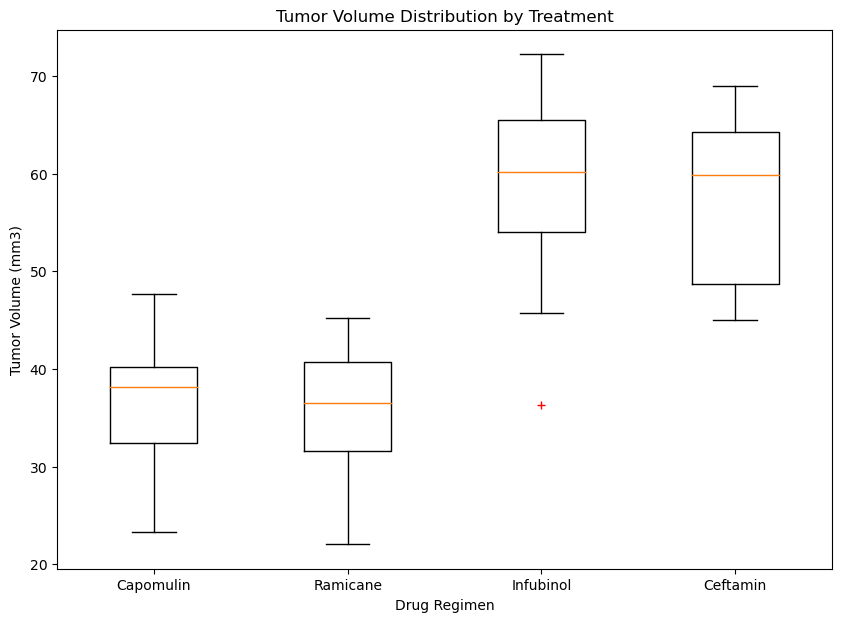

In [336]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


# Assuming tumor_vol_data is a dictionary with treatment names as keys and lists of tumor volumes as values
treatment_groups = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
data_to_plot = [tumor_vol_data[treatment] for treatment in treatment_groups]

# Create the box plot
plt.figure(figsize=(10, 7))
plt.boxplot(data_to_plot, labels=treatment_groups, sym='r+')

# Adding title and labels
plt.title('Tumor Volume Distribution by Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

# Show the plot
plt.show()


## Line and Scatter Plots

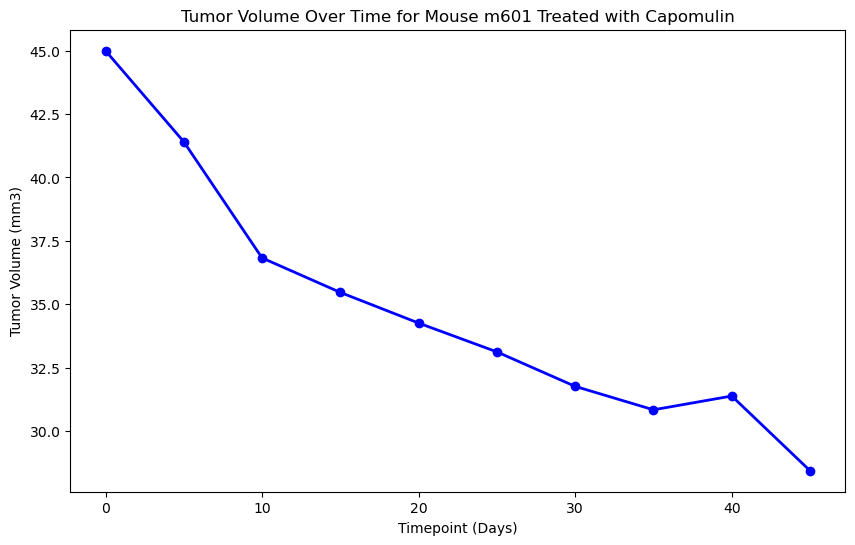

In [337]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


# Step 1: Select a Mouse ID (example: 'm601')
mouse_id = 'm601'  # Replace 'm601' with a valid Mouse ID from your dataset treated with Capomulin

# Step 2: Filter the data for the selected mouse treated with Capomulin
mouse_data = clean_data[(clean_data['Mouse ID'] == mouse_id) & (clean_data['Drug Regimen'] == 'Capomulin')]

# Step 3: Plot the data
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-', linewidth=2)

# Adding title and labels
plt.title(f'Tumor Volume Over Time for Mouse {mouse_id} Treated with Capomulin')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()


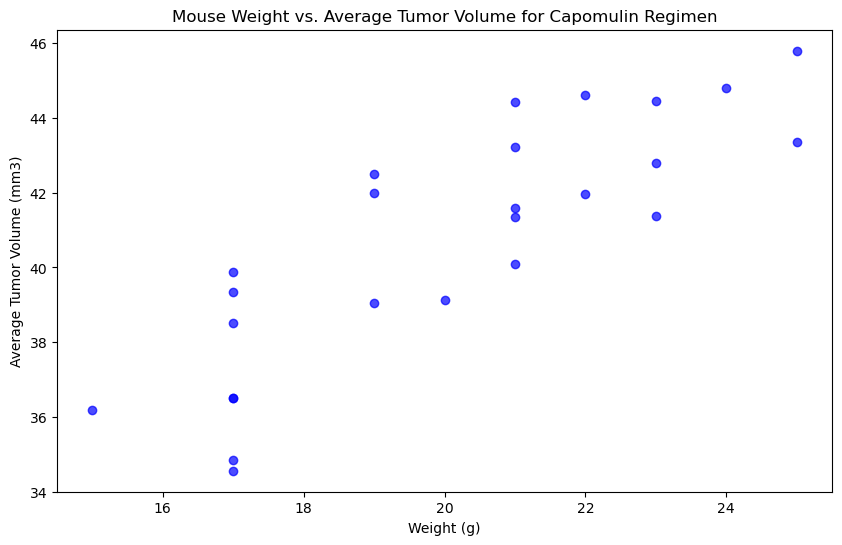

In [338]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


# Step 1: Filter the data for the Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Step 2: Group by 'Mouse ID' and calculate the average tumor volume
average_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Step 3: Merge the average tumor volume data with the original data to get the weight of each mouse
# Using 'inner' to ensure we only get data for mice in the Capomulin regimen
merged_data = pd.merge(average_tumor_vol, capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID', how='inner')

# Step 4: Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue', alpha=0.7)

# Adding title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


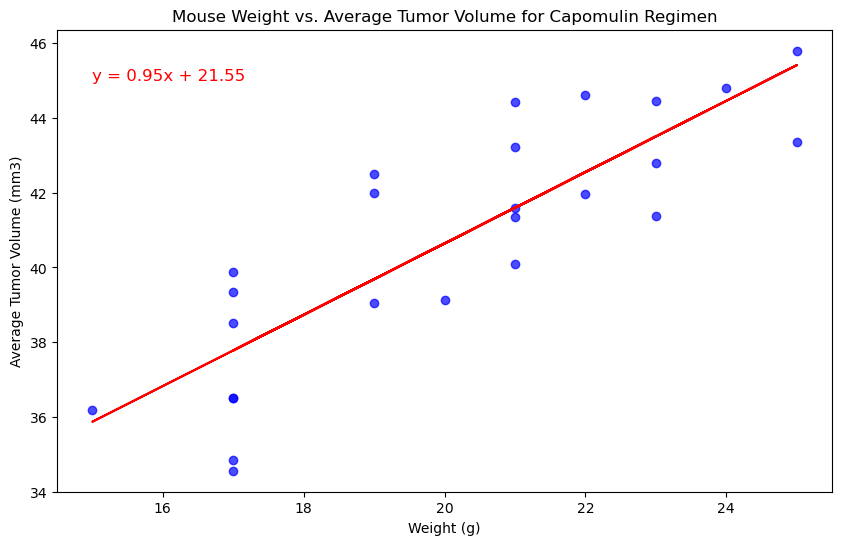

In [341]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


# Assuming 'merged_data' contains the average tumor volume and weight for each mouse in the Capomulin regimen

# Calculate the correlation coefficient
correlation_coefficient, _ = stats.pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation_coefficient:.2f}")

# Fit linear regression model
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue', alpha=0.7)
plt.plot(merged_data['Weight (g)'], intercept + slope * merged_data['Weight (g)'], 'r')

# Adding title, labels, and linear regression equation
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.text(15, 45, f'y = {slope:.2f}x + {intercept:.2f}', fontsize=12, color='red')

# Show the plot
plt.show()
